In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Sample Dataset

In [92]:
m = 100 # number of training examples
np.random.seed(11)

X = np.random.rand(m) * 10
Y = 1.3 * X + 5 + (np.random.rand(m)*5)

data = pd.DataFrame({'X': X, 'Y': Y})
data.head()

,X,Y
0,1.802697,8.934442
1,0.194752,6.343195
2,4.632185,15.246533
3,7.249339,15.934965
4,4.202036,12.653750


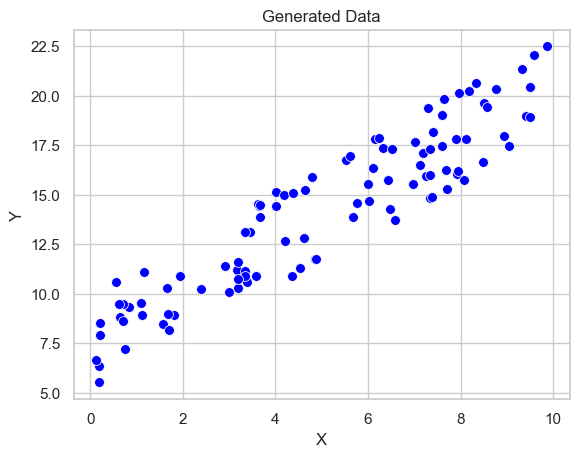

In [93]:
sns.scatterplot(x='X', y='Y', data=data, color='blue', s=50)
plt.title('Generated Data')
plt.show()

# Gradient Descent

**Goal**: to find the parameters (W, b) that minimize the cost function J in linear regression.
- **Model**: f(x) = Wx + b
- **Parameters**: W (weight), b (bias)
- **Cost Function**: J = (1/2m) Σ(f(x) - y)²
- **Learning Rate**: α
### Algorithm:
1. Initialize parameters W and b to 0 or small random values.

2. Repeat until convergence or for a fixed number of iterations:
   
   a. Compute predictions: f(x) = Wx + b
   
   b. Calculate gradients:
      - ∂J/∂W = (1/m) Σ((f(x) - y) * x)
      - ∂J/∂b = (1/m) Σ(f(x) - y)
   
   c. Update parameters:
      - W = W - α * (∂J/∂W)
      - b = b - α * (∂J/∂b)

In [94]:
def batch_gradient_descent(X, Y, learning_rate=0.01, epochs=1000):
    W, b = 0, 0
    m = len(X)

    for _ in range(epochs):
        y_pred = W * X + b

        dW = (1 / m) * np.sum((y_pred - Y) * X)
        db = (1 / m) * np.sum(y_pred - Y)

        W = W - learning_rate * dW
        b = b - learning_rate * db
    
    return W, b

In [95]:
def stochastic_gradient_descent(X, Y, learning_rate=0.01, epochs=1000):
    W, b = 0, 0
    m = len(X)

    for _ in range(epochs):
        for i in range(m):
            xi, yi = X[i], Y[i]
            yi_pred = W * xi + b

            dW = (yi_pred - yi) * xi
            db = (yi_pred - yi)

            W = W - learning_rate * dW
            b = b - learning_rate * db
    return W, b

In [103]:
def mini_batch_gradient_descent(X, Y, learning_rate=0.01, epochs=1000, batch_size=20):
    W, b = 0, 0
    m = len(X)
    num_batches = m // batch_size

    for _ in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            Y_batch = Y_shuffled[i:i + batch_size]

            y_pred = W * X_batch + b

            dW = (1 / batch_size) * np.sum((y_pred - Y_batch) * X_batch)
            db = (1 / batch_size) * np.sum(y_pred - Y_batch)

            W = W - learning_rate * dW
            b = b - learning_rate * db

    return W, b

In [104]:
x_train, y_train = data["X"], data["Y"]

W, b = batch_gradient_descent(x_train, y_train)
print(f"Optimized parameters: W = {W}, b = {b}")

W, b = stochastic_gradient_descent(x_train, y_train)
print(f"Optimized parameters: W = {W}, b = {b}")

W, b = mini_batch_gradient_descent(x_train, y_train)
print(f"Optimized parameters: W = {W}, b = {b}")


Optimized parameters: W = 1.4195598544575252, b = 6.874730758491631
Optimized parameters: W = 1.183136734822402, b = 7.307130152407751
Optimized parameters: W = 1.3210275821082391, b = 7.576293507278856
